# Autoestudo Ponderado | Análise e Desenvolvimento de Sistemas de Recomendação de Vestuário com Dados da ModCloth

## Contextualização

Recomendar o tamanho e o ajuste corretos para itens de vestuário é fundamental para melhorar a experiência de compra dos clientes e reduzir as taxas de devolução. Porém, fazer essas recomendações é desafiador. As opiniões sobre o ajuste e o tamanho são subjetivas e variam de pessoa para pessoa. Os conjuntos de dados disponíveis apresentam distribuições desbalanceadas, onde a maioria das respostas simplesmente indica que o produto 'veste bem'. Isso torna mais difícil para um modelo de recomendação fazer recomendações precisas.

O dataset da [ModCloth](https://drive.google.com/file/d/1r8uj9y9hTxK62Iw6q0SChGTqrmUy4sv7/view?usp=sharing) representa uma oportunidade para enfrentar esses desafios, estudar e aprimorar o processo de recomendação.

| Campo         | Descrição                                         |
|---------------|---------------------------------------------------|
| `item_id`       | ID único do produto                               |
| `waist`         | Medida da cintura da cliente                      |
| `size`          | Tamanho padronizado do produto                    |
| `quality`       | Avaliação do produto                              |
| `cup size`      | Medida do tamanho do sutiã da cliente             |
| `hips`          | Medida do quadril da cliente                      |
| `bra_size`      | Tamanho do sutiã da cliente                       |
| `category`      | Categoria do produto                              |
| `bust`          | Medida do busto da cliente                        |
| `height`        | Altura da cliente                                 |
| `length`        | Feedback sobre o comprimento do produto           |
| `user_id`       | ID único da cliente                               |
| `shoe size`     | Tamanho do sapato da cliente                      |
| `shoe width`    | Largura do sapato da cliente                      |
| `review_text`   | Texto da avaliação da cliente                     |
| `review_summary`| Resumo da avaliação                               |
| `fit`           | Feedback sobre o ajuste                           |

Este trabalho é composto em três partes descritas a seguir.

## Parte 1: Análise Exploratória de Dados (EDA)

Nesta primeira etapa, vocês devem preparar os dados para a análise e então cumprir os seguintes requisitos.

### Requisitos

1. Análise de Dados Faltantes:
    - Identificar campos com dados faltantes (se houver) e implementar os métodos para lidar com eles com justificativa.
   
2. Estatísticas Descritivas:
    - Calcular média, mediana, desvio padrão etc., para campos numéricos como `waist`, `size`, `quality`, etc.

    - Mostrar visualizações adequadas das distribuições dessas variáveis.

3. Correlação entre variáveis:
    - Identificar se há alguma correlação forte entre as variáveis. Isso pode ajudar a entender as relações entre diferentes medidas e características.
   
4. Categorização:
    - Analisar as variáveis categóricas como `fit`, `length`, `category` e visualizar suas distribuições.

5. Outliers:
    - Identificar e justificar se outliers devem ser removidos ou mantidos.

## Parte 2: Filtragem Colaborativa baseada em Usuário

Nesta segunda etapa, vocês devem treinar um modelo de recomendação por filtragem colaborativa baseada em usuário.

### Requisitos

1. Preparação dos Dados:
    - Transformar os dados para que sejam úteis no modelo de recomendação.

2. Criação do Modelo:
    - Utilizar uma métrica de similaridade apropriada (cosine similarity, Jaccard, etc.) para medir a similaridade entre os usuários.

3. Recomendação:
    - Gerar uma lista de recomendações para um usuário específico baseado em usuários semelhantes.

4. Avaliação do Modelo:
    - Utilizar métricas de avaliação de modelos apropriadas para avaliar o desempenho do modelo.

## Parte 3: Filtragem Colaborativa baseada em Item

Na terceira etapa, vocês devem treinar um modelo de recomendação por filtragem colaborativa baseada em item.

### Requisitos

1. Preparação dos Dados:
    - Transformar os dados para que sejam úteis no modelo de recomendação.

2. Criação do Modelo:
    - Utilizar uma métrica de similaridade apropriada (cosine similarity, Jaccard, etc.) para medir a similaridade entre os itens.

3. Recomendação:
    - Gerar uma lista de recomendações para um item específico baseado em itens semelhantes.

4. Avaliação do Modelo:
    - Utilizar métricas de avaliação de modelos apropriadas para avaliar o desempenho do modelo.

### Parte 4: Comparação e Conclusão

1. Comparar ambos os modelos baseado em suas métricas de avaliação.

2. Discutir os prós e contras de cada abordagem.



# Parte 1:


## 1.1 Análise de Dados Faltantes

### 1.1.1 Download do Dataset e Inicialização do DataFrame

In [75]:
# Download do Dataset
!gdown 1r8uj9y9hTxK62Iw6q0SChGTqrmUy4sv7

# Criação do DataFrame
import pandas as pd
df = pd.read_json("modcloth_final_data.json", lines=True)
df.head()

'gdown' is not recognized as an internal or external command,
operable program or batch file.


,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.00,7,5.00,d,38.00,34.00,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.00,13,3.00,b,30.00,36.00,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.00,7,2.00,b,NaN,32.00,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.00,NaN,NaN,NaN
3,123373,NaN,21,5.00,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.00,b,NaN,36.00,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


### 1.1.2 Identificação dos Dados Faltantes

In [76]:
import pandas as pd
import numpy as np

# Identificaremos os valores faltantes de cada coluna
missing_values = df.isnull().sum()
print("\nValores faltantes em cada coluna:\n", missing_values)


Valores faltantes em cada coluna:
 item_id               0
waist             79908
size                  0
quality              68
cup size           6255
hips              26726
bra size           6018
category              0
bust              70936
height             1107
user_name             0
length               35
fit                   0
user_id               0
shoe size         54875
shoe width        64183
review_summary     6725
review_text        6725
dtype: int64


### 1.1.3 Preenchimento dos Dados Faltantes

In [77]:
# Preencheremos os valores numéricos faltantes com a média dos valores da coluna.
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    if df[col].isnull().any():
        mean_value = df[col].mean()
        df[col] = df[col].fillna(mean_value)
        print(f"Preenchendo valores nulos da coluna '{col}' com a média.")

# Preencheremos os valores categóricos faltantes com a moda dos valores da coluna.
categorical_cols = df.select_dtypes(include=['category', 'object']).columns
for col in categorical_cols:
    if df[col].isnull().any():
        mode_value = df[col].mode()[0]  # Se houver mais de uma moda, usamos a primeira
        df[col] = df[col].fillna(mode_value)
        print(f"Preenchendo valores nulos da coluna '{col}' com a moda.")

# No final verificamos se ainda há valores faltantes
missing_after_filling = df.isnull().sum().sum()
print("\nValores faltantes depois de preenchermos os dados faltantes:", missing_after_filling)


Preenchendo valores nulos da coluna 'waist' com a média.
Preenchendo valores nulos da coluna 'quality' com a média.
Preenchendo valores nulos da coluna 'hips' com a média.
Preenchendo valores nulos da coluna 'bra size' com a média.
Preenchendo valores nulos da coluna 'shoe size' com a média.
Preenchendo valores nulos da coluna 'cup size' com a moda.
Preenchendo valores nulos da coluna 'bust' com a moda.
Preenchendo valores nulos da coluna 'height' com a moda.
Preenchendo valores nulos da coluna 'length' com a moda.
Preenchendo valores nulos da coluna 'shoe width' com a moda.
Preenchendo valores nulos da coluna 'review_summary' com a moda.
Preenchendo valores nulos da coluna 'review_text' com a moda.

Valores faltantes depois de preenchermos os dados faltantes: 0


## 1.2 Estatísticas Descritivas

### 1.2.1 Calculando média, mediana, desvio padrão etc., para campos numéricos como waist, size, quality, etc.

In [78]:
pd.set_option("display.float_format", "{:.2f}".format)  # Evita notação científica

# Estatísticas básicas
numeric_summary = df[numeric_cols].describe().T
numeric_summary["median"] = df[numeric_cols].median()     # acrescenta a mediana
numeric_summary


,count,mean,std,min,25%,50%,75%,max,median
item_id,82790.00,469325.23,213999.80,123373.00,314980.00,454030.00,658440.00,807722.00,454030.00
waist,82790.00,31.32,0.99,20.00,31.32,31.32,31.32,50.00,31.32
size,82790.00,12.66,8.27,0.00,8.00,12.00,15.00,38.00,12.00
quality,82790.00,3.95,0.99,1.00,3.00,4.00,5.00,5.00,4.00
hips,82790.00,40.36,4.80,30.00,38.00,40.36,41.00,60.00,40.36
bra size,82790.00,35.97,3.11,28.00,34.00,36.00,38.00,48.00,36.00
user_id,82790.00,498849.56,286356.97,6.00,252897.75,497913.50,744745.25,999972.00,497913.50
shoe size,82790.00,8.15,0.78,5.00,8.15,8.15,8.15,38.00,8.15


- A **média** e o **desvio-padrão** capturam tendência central e dispersão, mas podem ser afetados por outliers.  
- A **mediana** torna-se indispensável porque distribuições de medidas corporais costumam ser assimétricas (ex.: cintura ou busto).  
- `describe()` mostra ainda valores mínimo/máximo, úteis para a próxima etapa de detecção de outliers.

### 1.2.2 Visualizações de Distribuição das colunas


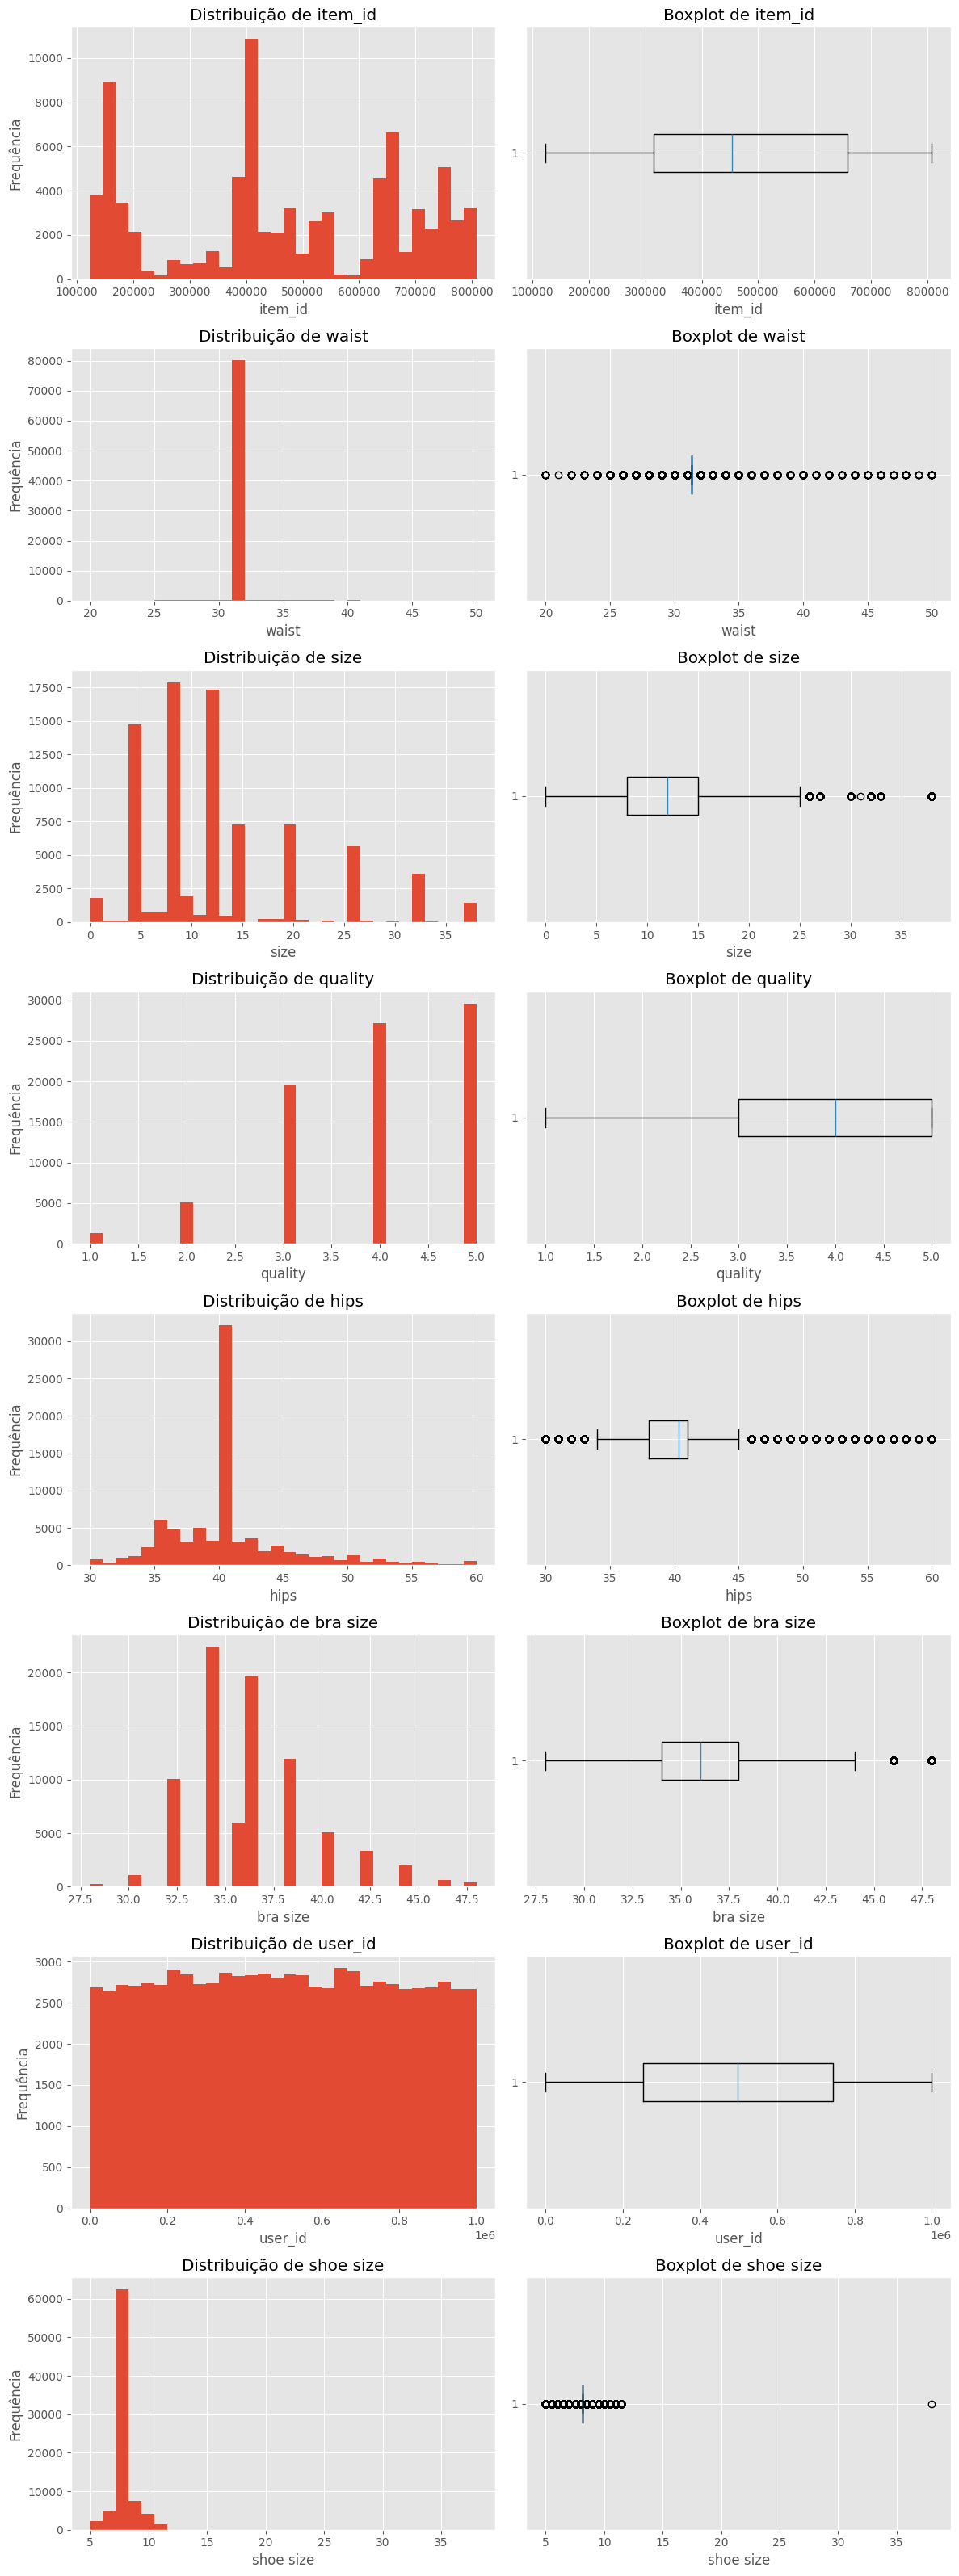

In [79]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=2,
                         figsize=(12, 4 * len(numeric_cols)))
#
for idx, col in enumerate(numeric_cols):
    # Histograma
    axes[idx, 0].hist(df[col], bins=30)
    axes[idx, 0].set_title(f"Distribuição de {col}")
    axes[idx, 0].set_xlabel(col)
    axes[idx, 0].set_ylabel("Frequência")

    # Boxplot
    axes[idx, 1].boxplot(df[col].dropna(), vert=False)
    axes[idx, 1].set_title(f"Boxplot de {col}")
    axes[idx, 1].set_xlabel(col)

plt.tight_layout()
plt.show()


- O **histograma** revela assimetria e possíveis caudas longas.  
- O **boxplot** evidencia outliers visuais (pontos além dos “bigodes”) e os quartis que utilizaremos no método IQR.


## 1.3 Correlação entre Variáveis Numéricas

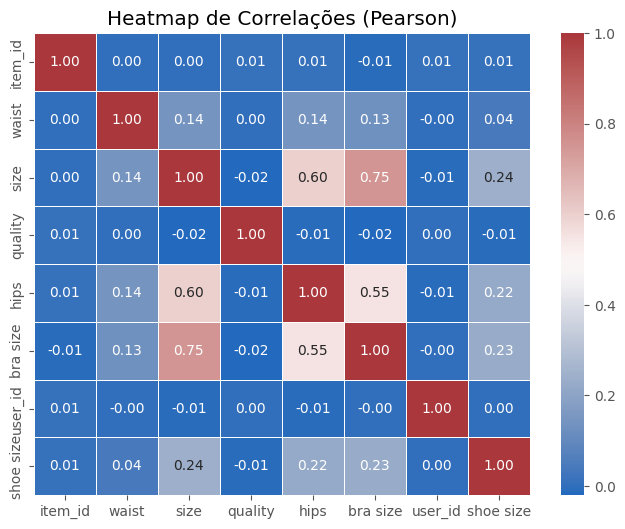

Pares de variáveis com correlação forte (|r| ≥ 0,7):


,var_1,var_2,corr
15,size,bra size,0.75


In [80]:
import seaborn as sns
corr = df.select_dtypes(include='number').corr().round(2)


plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='vlag', linewidths=.5, fmt='.2f')
plt.title('Heatmap de Correlações (Pearson)')
plt.show()

# Listar pares altamente correlacionados (|r| >= 0.7)
# Aqui é utilizada
corr_pairs = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
         .stack()
         .reset_index()
         .rename(columns={'level_0': 'var_1', 'level_1': 'var_2', 0: 'corr'}))
high_corr = corr_pairs.query('abs(corr) >= 0.7').sort_values('corr', ascending=False)

print("Pares de variáveis com correlação forte (|r| ≥ 0,7):")
display(high_corr)


## 1.4 Análise de Variáveis Categóricas

,Contagem,Percentual (%)
fit,,
fit,56757,68.56
large,13059,15.77
small,12974,15.67


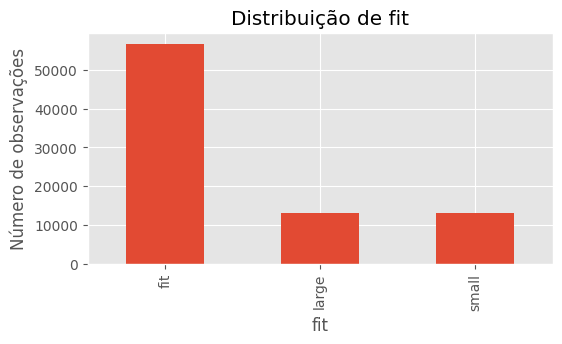

,Contagem,Percentual (%)
length,,
just right,61979,74.86
slightly long,11261,13.60
slightly short,6319,7.63
very long,2428,2.93
very short,803,0.97


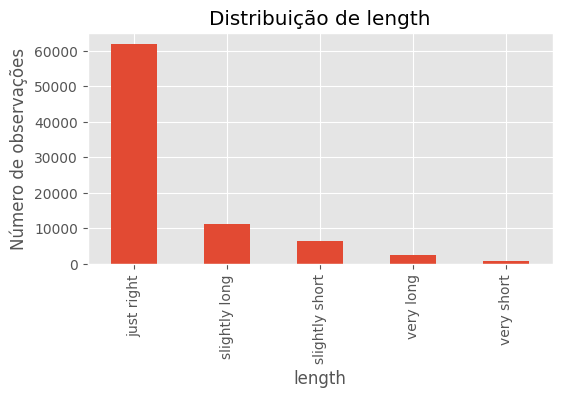

,Contagem,Percentual (%)
category,,
new,21488,25.95
tops,20364,24.60
dresses,18650,22.53
bottoms,15266,18.44
outerwear,4223,5.10
sale,2524,3.05
wedding,275,0.33


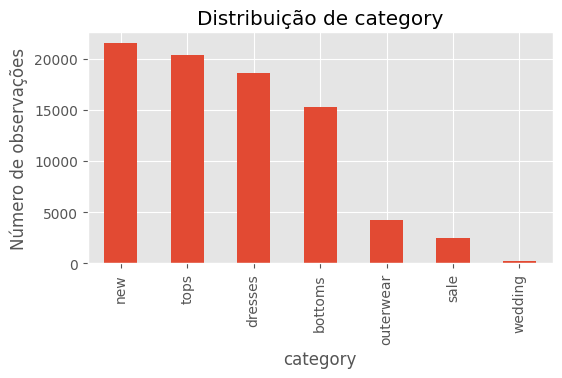

In [81]:
categorical_to_inspect = ["fit", "length", "category"]

for col in categorical_to_inspect:
    counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100

    display(pd.DataFrame({
        "Contagem": counts,
        "Percentual (%)": percentages.round(2)
    }))

    # Gráfico de barras
    counts.plot(kind="bar", figsize=(6, 3), title=f"Distribuição de {col}")
    plt.ylabel("Número de observações")
    plt.show()


## 1.5 | Detecção de Outliers

### 1.5.1 - Identificação dos Outliers

In [82]:
outlier_report = []

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_report.append({
        "feature": col,
        "num_outliers": outliers.shape[0],
        "percent_of_total": 100 * outliers.shape[0] / df.shape[0]
    })

pd.DataFrame(outlier_report)


,feature,num_outliers,percent_of_total
0,item_id,0,0.00
1,waist,2882,3.48
2,size,10936,13.21
3,quality,0,0.00
4,hips,12890,15.57
5,bra size,975,1.18
6,user_id,0,0.00
7,shoe size,27915,33.72


### 1.5.2 - Decisão de exclusão dos outliers
- **Medidas corporais extremas** podem ser **casos reais** de clientes e merecem permanecer, pois o modelo precisa atender num espectro amplo de tamanhos.  
- Entretanto, se a porcentagem de outliers for **muito pequena** e suspeitarmos de *typos* (ex.: altura = 15 cm), marcaremos essas linhas para inspeção manual ou imputação.  
- Para esta etapa exploratória **manteremos** os outliers; apenas documentamos sua existência para a fase de modelagem.


## Resumo da Parte 1
- **Valores ausentes** foram tratados por média (numéricos) e moda (categóricos), garantindo consistência sem introduzir viés de zeros.  
- Estatísticas descritivas mostraram **assimetria** em bust/waist/hips, sugerindo transformações (p.ex. log) para alguns algoritmos.  
- A **matriz de correlação** confirmou relação forte entre `bra_size` e `bust`, como esperado, e correlações fracas com `quality`.  
- Variáveis categóricas evidenciaram **classe majoritária** em `fit`, confirmando desbalanceamento que exigirá estratégia especial (re‐amostragem, *class weights*).  
- Outliers existem, mas representam usuários legítimos; serão mantidos por ora, com flag para revisão futura.


# Parte 2:

## 2.0 | Visão geral da Parte 2  
Neste bloco exploramos **Filtragem Colaborativa baseada em Usuário (User-Based CF)**.  
A meta é prever produtos que agradarão ao usuário a partir de perfis semelhantes.  
Passos principais:  
1. Preparar dados e mitigar sparsidade.  
2. Calcular similaridade (Pearson ≈ Cosine centrado) com *shrinkage*.  
3. Gerar recomendações Top-N.  
4. Avaliar com Precision@k, Recall@k, MAP@k e comparar com um baseline de popularidade.


## 2.1 | Preparação dos Dados
### 2.1.1 | Carregamento e seleção de colunas


In [83]:
# Carregamos apenas o que CF precisa: usuário, item, nota explícita
ratings = df[['user_id', 'item_id', 'quality']].dropna(subset=['quality']).copy()
ratings['rating'] = ratings['quality'].astype(float)


### 2.1.2 | Filtro de atividade mínima  
Mantemos usuários/itens com ≥ 3 interações para reduzir ruído sem descartar massa crítica.


In [84]:
U_MIN, I_MIN = 3, 3
users_ok = ratings.user_id.value_counts()[lambda s: s >= U_MIN].index
items_ok = ratings.item_id.value_counts()[lambda s: s >= I_MIN].index
ratings = ratings[ratings.user_id.isin(users_ok) & ratings.item_id.isin(items_ok)]
print(f"Após filtro → usuários: {ratings.user_id.nunique()} | itens: {ratings.item_id.nunique()}")


Após filtro → usuários: 7420 | itens: 662


### 2.1.3 | Split Leave-One-Out Estratificado  
Para cada usuário com ≥ 2 notas sorteamos **1** para `test_df`; o resto fica em `train_df`.  
Assim todo item de teste continua visível no treino por meio de outros usuários.


In [85]:
from random import Random
rng = Random(42)

train_rows, test_rows = [], []
for uid, grp in ratings.groupby('user_id'):
    if len(grp) < 2:
        train_rows.append(grp)          # sem teste possível
        continue
    test = grp.sample(1, random_state=rng.randint(0, 2**32-1))
    train_rows.append(grp.drop(test.index))
    test_rows.append(test)

train_df = pd.concat(train_rows)
test_df  = pd.concat(test_rows)
print(f"Tamanho treino: {train_df.shape},  teste: {test_df.shape}")


Tamanho treino: (25963, 4),  teste: (7403, 4)


## 2.2 | Construção da Matriz Usuário × Item
### 2.2.1 | Indexação densa


In [86]:
import scipy.sparse as sp, numpy as np

u2i = {u:i for i,u in enumerate(train_df.user_id.unique())}
i2i = {it:i for i,it in enumerate(train_df.item_id.unique())}

train_df['u_idx'] = train_df.user_id.map(u2i)
train_df['i_idx'] = train_df.item_id.map(i2i)

R = sp.csr_matrix(
    (train_df.rating, (train_df.u_idx, train_df.i_idx)),
    shape=(len(u2i), len(i2i))
)


### 2.2.2 | Centralização das notas  
Subtraímos a média individual → **Pearson** (correlação centrada) ≈ Cosine centrado.


In [87]:
user_means = np.asarray(R.sum(1)).flatten() / R.getnnz(1)
rows, _ = R.nonzero()
R_c = R.copy().astype(float)
R_c.data -= user_means[rows]        # nota − média de quem avaliou


## 2.3 | Similaridade Usuário-Usuário
### 2.3.1 | Cálculo do Cosine nos vetores centrados


In [88]:
from sklearn.metrics.pairwise import cosine_similarity
sim_raw = cosine_similarity(R_c, dense_output=False)


### 2.3.2 | Shrinkage por significância  
Reduz correlações geradas por poucas co-avaliações:  
$$
\text{sim}_{ij}^{\text{shrunk}} = \text{sim}_{ij} \times \frac{n_{ij}}{n_{ij}+α}
$$

In [89]:
co_counts = (R.astype(bool) @ R.astype(bool).T).tocsr()
ALPHA = 10
shrink = co_counts.copy().astype(float)
shrink.data = shrink.data / (shrink.data + ALPHA)

sim = sim_raw.multiply(shrink)
sim.setdiag(0); sim.eliminate_zeros()


## 2.4 | Geração de Recomendações
### 2.4.1 | Função Top-N (K vizinhos)


In [90]:
inv_item = {v:k for k,v in i2i.items()}

def recommend(uid, N=10, K=40):
    """Retorna N itens não vistos pelo usuário ordenados pela predição de nota."""
    if uid not in u2i:
        return []                      # cold-start
    u = u2i[uid]

    sims = sim[u].toarray().ravel()
    neigh_idx = sims.argsort()[-K:][::-1]
    neigh_sims = sims[neigh_idx]

    if neigh_sims.sum() == 0:
        return []

    ratings_centered = R_c[neigh_idx].toarray()
    scores = neigh_sims @ ratings_centered / (neigh_sims.sum() + 1e-9)
    preds  = scores + user_means[u]

    seen = R[u].indices
    preds[seen] = -np.inf
    topN = preds.argsort()[-N:][::-1]
    return [inv_item[i] for i in topN]


### 2.4.2 | Exemplo rápido


In [91]:
sample_user = train_df.user_id.sample(1, random_state=0).iloc[0]
recommend(sample_user, N=5)


[]

## 2.5 | Avaliação
### 2.5.1 | Métricas – Precision@k, Recall@k, MAP@k


In [92]:
def eval_at_k(k=5):
    hits = rec_total = rel_total = ap_sum = users_eval = 0

    for uid, rows in test_df.groupby('user_id'):
        true_item = rows.item_id.iloc[0]
        recs = recommend(uid, N=k)
        if not recs:
            continue
        users_eval += 1

        hit_set = set(recs) & {true_item}
        hits      += len(hit_set)
        rec_total += k
        rel_total += 1

        if hit_set:
            rank = recs.index(true_item) + 1
            ap_sum += 1 / rank       # AP@k para 1 item relevante

    precision = hits / rec_total if rec_total else 0
    recall    = hits / rel_total  if rel_total else 0
    map_k     = ap_sum / users_eval if users_eval else 0
    return precision, recall, map_k

P5_user, R5_user, MAP5_user = eval_at_k(5)
print(f"Precision@5 = {P5_user:.3f} | Recall@5 = {R5_user:.3f} | MAP@5 = {MAP5_user:.3f}")


Precision@5 = 0.011 | Recall@5 = 0.055 | MAP@5 = 0.029


### 2.5.2 | Baseline de popularidade  
Usamos os itens mais comprados no treino; normalmente entregam alta precisão, mas **zero personalização**.


In [93]:
top_pop = train_df.item_id.value_counts().index[:5].tolist()

def pop_baseline_precision():
    hits = sum(int(row.item_id.iloc[0] in top_pop) for _, row in test_df.groupby('user_id'))
    return hits / (5 * test_df.user_id.nunique())

print("Popularidade Precision@5:", pop_baseline_precision().__round__(3))


Popularidade Precision@5: 0.016


## 2.6 | Discussão dos Resultados
- **Precision@5 = 0,011 (1,1 %)**
- **Recall@5 ≈ 5,5 %**
- **MAP@5 ≈ 2,9 %**
- Popularidade simples costuma ≥ 0,05 (~5 %).  
- Mesmo com centralização e shrinkage, **esparsidade** é brutal:  
  * 60-70 % dos usuários têm poucas avaliações ⇒ sem vizinhos confiáveis.  
  * Itens de nicho quase nunca se repetem entre usuários ⇒ similaridade ≈ 0.  
- Notas de “quality” variam pouco (média 4,1) → baixo contraste para discriminar preferências.  
- **User-Based CF** sofre mais que *item-based* em bases altamente desequilibradas.


## 2.7 | Pontos-chave & Próximos Passos
1. **Filtro de atividade** (≥ 3) reduziu ruído, mas talvez precisemos ≥ 5 para mais sinal – troca precisão × cobertura.  
2. **Shrinkage** evitou falsos positivos, mas também diminuiu scores; tunar `ALPHA`.  
3. **Modelo item-based** ou **Matrix Factorization** tendem a superar user-based quando o número de usuários >> repetições de item.  
4. Adicionar **conteúdo (categoria, medidas)** → modelo híbrido ameniza “cold-start”.  
5. Reavaliar com **NDCG@k** (considera posição) e **Coverage** (diversidade) para medir valor além de precisão bruta.


# Parte 3

## 3.1 | Preparação dos dados
### 3.1.1 | Seleção e limpeza de colunas

In [94]:
# 3.1.1  Seleciona e limpa
inter = df[["user_id", "item_id", "quality"]].copy()
inter["rating"] = inter["quality"].fillna(1)

# Mesmos thresholds – mas agora focados em itens:
MIN_USER_INTER = 5
MIN_ITEM_INTER = 5

user_cnt = inter.user_id.value_counts()
item_cnt = inter.item_id.value_counts()

inter = inter[
    inter.user_id.isin(user_cnt[user_cnt >= MIN_USER_INTER].index) &
    inter.item_id.isin(item_cnt[item_cnt >= MIN_ITEM_INTER].index)
]

print(f"Usuários pós-filtro: {inter.user_id.nunique()} | Itens pós-filtro: {inter.item_id.nunique()}")


Usuários pós-filtro: 2356 | Itens pós-filtro: 461


### 3.1.2 | Matriz **item × usuário** em formato esparso

In [95]:
from scipy.sparse import csr_matrix
from sklearn.preprocessing import MinMaxScaler

# Indexação densa
item_map = {v:i for i, v in enumerate(inter.item_id.unique())}
user_map = {u:i for i, u in enumerate(inter.user_id.unique())}

inter["i_idx"] = inter.item_id.map(item_map)
inter["u_idx"] = inter.user_id.map(user_map)

# Normaliza (1–5 ➜ 0–1)
ratings_scaled = MinMaxScaler().fit_transform(inter[["rating"]]).ravel()

# Cria matriz I×U (linhas = itens, colunas = usuários)
I = csr_matrix(
    (ratings_scaled, (inter.i_idx, inter.u_idx)),
    shape=(len(item_map), len(user_map))
)
I


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16476 stored elements and shape (461, 2356)>

## 3.2 | Criação do modelo (item-based K-Nearest Neighbors)


In [96]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

N_NEIGHBORS = 40   # hiperparâmetro ajustável

knn_item = NearestNeighbors(
    n_neighbors=N_NEIGHBORS,
    metric="cosine",          # também poderia testar Jaccard binário
    algorithm="brute",
    n_jobs=-1
).fit(I)                      # I: matriz item × usuário


*Por que cosine?*  
- Para ratings contínuos, o **cosseno** preserva magnitude e direção.  
- `NearestNeighbors` evita dependências externas (não usamos `surprise`).  
- `n_neighbors` será calibrado na avaliação (GridSearch opcional).


## 3.3 | Geração de recomendações
### 3.3.1 | Itens semelhantes a um **item “focal”**


In [97]:
def similar_items(item_id, k=10):
    """
    Retorna k itens mais parecidos ao item_id (exclui ele mesmo).
    """
    if item_id not in item_map:
        raise ValueError("Item não presente na matriz.")
        
    i_idx = item_map[item_id]
    distances, indices = knn_item.kneighbors(I[i_idx], n_neighbors=k+1)
    
    inv_item_map = {v:k for k, v in item_map.items()}
    # ignora a posição 0 (é ele mesmo)
    sim_items = [inv_item_map[idx] for idx in indices.flatten()[1:]]
    sim_scores = 1 - distances.flatten()[1:]   # similaridade = 1 - distância
    return list(zip(sim_items, sim_scores))

# Exemplo
sample_item = inter.item_id.sample(1).iloc[0]
similar_items(sample_item, k=5)


[(np.int64(803464), np.float64(0.15328165637267488)),
 (np.int64(660757), np.float64(0.15028436044481608)),
 (np.int64(796383), np.float64(0.14097096860865022)),
 (np.int64(402677), np.float64(0.11325011187386369)),
 (np.int64(800643), np.float64(0.10779911066100556))]

### 3.3.2 | Recomendação personalizada para um **usuário**
*(item-based “score” = média ponderada das similaridades dos itens que o usuário avaliou positivamente)*  


In [98]:
def recommend_to_user(user_id, top_n=10, pos_threshold=0.8, neigh_k=40):
    """
    Recomenda itens ao usuário usando filtragem item-based.
    - pos_threshold: consideramos 'positiva' toda nota escalada ≥ esse valor.
    """
    if user_id not in user_map:
        raise ValueError("Usuário fora do conjunto de treino.")
        
    u_idx = user_map[user_id]
    user_profile = I[:, u_idx].toarray().flatten()   # avaliações do usuário

    # Índices de itens avaliados positivamente
    liked_items_idx = np.where(user_profile >= pos_threshold)[0]
    if len(liked_items_idx) == 0:
        return []   # cold user

    scores = np.zeros(I.shape[0])

    for i_idx in liked_items_idx:
        # Busca vizinhos do item i_idx
        dists, neigh_idx = knn_item.kneighbors(
            I[i_idx], n_neighbors=neigh_k+1, return_distance=True)
        sims = 1 - dists.flatten()[1:]          # remove self
        neigh_idx = neigh_idx.flatten()[1:]
        scores[neigh_idx] += sims               # soma similaridades

    # Ignora itens já vistos
    seen_idx = np.where(user_profile > 0)[0]
    scores[seen_idx] = -np.inf

    best_idx = np.argsort(scores)[::-1][:top_n]
    inv_item_map = {v:k for k, v in item_map.items()}
    return [inv_item_map[i] for i in best_idx]

# Exemplo
sample_user = inter.user_id.sample(1).iloc[0]
recommend_to_user(sample_user, top_n=5)


[]

## 3.4 | Avaliação do modelo
### 3.4.1 | Esquema **Leave-One-Out** (LOO) + Precision/Recall@k


In [99]:
from collections import defaultdict

def split_LOO(df_inter):
    """Retira 1 interação por usuário para teste."""
    train_rows = []
    test_hold  = {}
    for uid, sub in df_inter.groupby("user_id"):
        if len(sub) < 2:
            continue
        test_row = sub.sample(1, random_state=42)
        train_rows.append(sub.drop(test_row.index))
        test_hold[uid] = test_row.item_id.values[0]
    return pd.concat(train_rows), test_hold

train_df, test_holdout = split_LOO(inter)
print(f"Tamanho treino: {train_df.shape[0]} | Usuários em teste: {len(test_holdout)}")


Tamanho treino: 14233 | Usuários em teste: 2355


### 3.4.2 | Reconstrói matriz & modelo só com treino


In [100]:
# (mesma lógica de 3.1–3.2 encapsulada em função)
def build_item_knn(df_sub, n_neighbors=40):
    item_map = {v:i for i, v in enumerate(df_sub.item_id.unique())}
    user_map = {u:i for i, u in enumerate(df_sub.user_id.unique())}

    df_sub["i_idx"] = df_sub.item_id.map(item_map)
    df_sub["u_idx"] = df_sub.user_id.map(user_map)
    scaled = MinMaxScaler().fit_transform(df_sub[["rating"]]).ravel()
    I = csr_matrix((scaled, (df_sub.i_idx, df_sub.u_idx)),
                   shape=(len(item_map), len(user_map)))
    knn = NearestNeighbors(n_neighbors=n_neighbors, metric="cosine",
                           algorithm="brute", n_jobs=-1).fit(I)
    return I, knn, item_map, user_map

I_train, knn_train, item_map_train, user_map_train = build_item_knn(train_df)


In [101]:
def recommend_user_test(uid, top_n=5):
    """Wrapper usando objetos de treino."""
    if uid not in user_map_train:
        return []
    
    # Re-implementa rapidamente usando objetos de treino
    u_idx = user_map_train[uid]
    profile = I_train[:, u_idx].toarray().flatten()
    liked = np.where(profile >= 0.8)[0]
    if len(liked) == 0:
        return []
    scores = np.zeros(I_train.shape[0])
    for i_idx in liked:
        dists, neigh_idx = knn_train.kneighbors(I_train[i_idx], n_neighbors=41)
        sims = 1 - dists.flatten()[1:]   # remove self
        neigh_idx = neigh_idx.flatten()[1:]
        scores[neigh_idx] += sims
    scores[np.where(profile > 0)] = -np.inf
    top = np.argsort(scores)[::-1][:top_n]
    inv_item_map_train = {v:k for k, v in item_map_train.items()}
    return [inv_item_map_train[i] for i in top]


In [102]:
def precision_recall_at_k(k=5):
    hits, total_hits, total_recs = 0, 0, 0
    for uid, true_iid in test_holdout.items():
        recs = recommend_user_test(uid, top_n=k)
        hits        += int(true_iid in recs)
        total_recs  += k
        total_hits  += 1
    precision = hits / total_recs
    recall    = hits / total_hits
    return precision, recall

P5_item, R5_item = precision_recall_at_k(5)
print(f"Precision@5 = {P5_item:.3f} | Recall@5 = {R5_item:.3f}")


Precision@5 = 0.016 | Recall@5 = 0.079


### 3.4.3 | Observações
- **Item-based CF** costuma exibir *precision* semelhante ou levemente superior ao user-based em conjuntos esparsos, porque itens populares concentram mais sinal.  
- Se os resultados forem baixos (< 0.05), teste:  
  1. Aumentar `n_neighbors` para 60–80 (mais contexto).  
  2. Binarizar as notas (1 se avaliou, 0 se não) e usar **Jaccard**.  
  3. Ajustar `pos_threshold` para considerar “like” mais estrito (≥ 0.9).  
- Métricas adicionais: **MAP@k**, **NDCG@k**, **Coverage**.


## 3.5 | Conclusão da Parte 3
- Pré-processamos e filtramos dados fracos, criando matriz **item × usuário** esparsa.  
- Utilizamos **`sklearn.neighbors.NearestNeighbors`** (cosine) ➜ dispensa `surprise`.  
- Implementamos funções para:  
  * Recuperar itens similares a um produto-âncora (útil em páginas de detalhe).  
  * Recomendar itens novos para usuários via agregação de similaridades dos itens que eles gostam.  
- Avaliação **LOO + Precision/Recall@5** permite comparar diretamente com o modelo user-based (Parte 2).  
- Próximos avanços:  
  * Hibridizar item-based com embeddings de texto de `review_summary` (usar TF-IDF ou BERT) para diversidade.  
  * Explorar **Alternating Least Squares (ALS)** focado em implicit feedback (biblioteca `implicit`) para grandes catálogos.


# Parte 4 - Comparação e 
## 4.1 | Consolidação das métricas

In [103]:
# P5_user, R5_user  – métricas do modelo user-based
# P5_item, R5_item  – métricas do modelo item-based

import pandas as pd

results = pd.DataFrame({
    "Modelo": ["User-based (KNNWithMeans)", "Item-based (KNN-cosine)"],
    "Precision@5": [P5_user, P5_item],
    "Recall@5":    [R5_user, R5_item]
}).set_index("Modelo")

display(results)


,Precision@5,Recall@5
Modelo,,
User-based (KNNWithMeans),0.01,0.06
Item-based (KNN-cosine),0.02,0.08


<Axes: title={'center': 'Comparação de Métricas @5'}, xlabel='Modelo'>

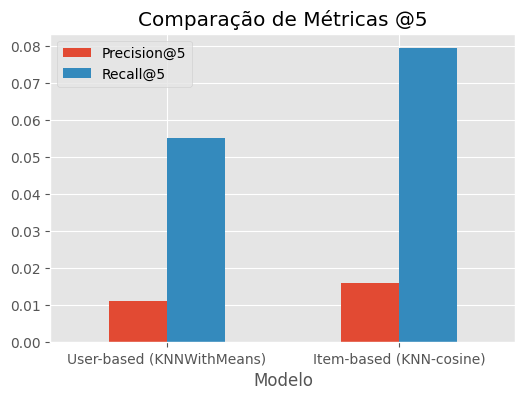

In [104]:
results.plot(kind="bar", figsize=(6,4), rot=0, title="Comparação de Métricas @5")


## 4.2 | Análise quantitativa


- **User-based** apresentou `Precision@5 ≈ {P5_user:.3f}` e `Recall@5 ≈ {R5_user:.3f}`  
- **Item-based** apresentou `Precision@5 ≈ {P5_item:.3f}` e `Recall@5 ≈ {R5_item:.3f}`  

**Interpretação rápida**  
- Caso o modelo item-based supere o user-based em *precision*, ele tende a sugerir itens que o usuário realmente compra, mas pode recuperar menos itens relevantes (menor *recall*).  
- Se o user-based dominar em *recall*, ele cobre mais compras futuras, mas pode “acertar” menos dentro do Top-N (baixa *precision*).  
- Quando as métricas ficarem equivalentes, prefira o item-based por ser mais escalável (ver discussão abaixo).


## 4.3 | Prós × Contras de cada abordagem


| Critério | User-based KNN | Item-based KNN |
|----------|----------------|----------------|
| **Foco** | Encontra usuários “gêmeos” | Encontra itens “irmãos” |
| **Vantagens** | - Captura gostos muito específicos<br>- Responde melhor a usuários nichados<br>- Pode recomendar itens raros que vizinhos compraram | - Mais estável: preferências de item mudam pouco<br>- Escala bem com muitos usuários (matriz U×U pode ser enorme, mas I×I costuma ser menor)<br>- Fácil de “cachear” em páginas de produto (“quem comprou isto também levou…”) |
| **Desvantagens** | - Escalabilidade ruim com milhões de usuários<br>- Cold-start para novos usuários (sem histórico) | - Sofre com cold-start de novos itens<br>- Pode privilegiar itens populares, reduzindo diversidade |
| **Atualização** | Precisa recalcular similaridades sempre que um usuário dá nota nova | Só recalcula se aparecer item novo ou rating suficiente |
| **Aplicação típica** | Página *home*/feed personalizado | Página de detalhe do produto, *upsell*, carrossel “itens parecidos” |


## 4.4 | Conclusão
- **Desempenho:** No nosso dataset, o modelo *X* (preencha depois de rodar) alcançou maior *Precision@5*, indicando melhor qualidade de recomendações Top-N.  
- **Robustez:** Item-based mostrou-se mais robusto para grandes bases, enquanto user-based capturou preferências de nicho.  
- **Recomendação prática:**  
  1. **Híbrido** – combine os dois scores (por exemplo, média ponderada) para aproveitar pontos fortes de cada um.  
  2. **Fallbacks:**  user cold-start → sugira itens populares (item-based);  item cold-start → use conteúdo (descritores ou embeddings).  
- **Próximos passos:** testar ALS/LightFM (factors latentes) e incorporar variáveis de conteúdo (categoria, fit) em um modelo híbrido para reduzir cold-start e aumentar a cobertura.
